In [247]:
#제목 : Auto Insurance - CustomerLifetimeValue

#Customer : 고객번호
#State : 주
#Customer Lifetime Value : 고객생애가치(보험)
#Response : 응답여부(Yes,No)
#Coverage : 보험 등급
#Education : 학력
#Effective to Date : 보험 효력일
#EmploymentStatus : 직업 현황
#Gender : 성별
#Income : 소득
#Location Code : 사는 지역이 도시인지 시골인지 여부
#Marital Status : 결혼 여부
#Monthly Premium Auto : 월 자동차보험료
#Months Since Last Claim : 보험청구 이후 몇달이 지났는지 나타내주는 변수
#Months Since Policy Inception : 보험가입 이후 지난 월수
#Number of Open Complaints : 미결 불만 건수
#Number of Policies : 보험의 개수
#Policy Type : 보험의 종류
#Policy : 개인,단체,특약
#Renew Offer Type : 갱신 오퍼 유형
#Sales Channel : 고객이 어떤 경로를 통해 상품을 구입했는지
#Total Claim Amount : 보험청구비용 합계
#Vehicle Class : 자동차 클래스
#Vehicle Size : 자동차 크기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
data=pd.read_csv("C:\\Users\\Jeong SeungJu\\OneDrive\\바탕 화면\\운수데통\\AutoInsurance.csv",encoding='euc-kr')

In [6]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
data['EmploymentStatus'][data['Income']==0].unique()
#수입이 0인 사람들은 모두 unemployed였기 때문에 Income이 0인 것을 결측치로 생각하지 않고 계속 진행하였다.

array(['Unemployed'], dtype=object)

In [19]:
data=data.drop(['Customer'],axis=1)

In [34]:
for i in data.columns:
    print(i," : ",data[i].dtype)

State  :  object
Customer Lifetime Value  :  float64
Response  :  object
Coverage  :  object
Education  :  object
Effective To Date  :  object
EmploymentStatus  :  object
Gender  :  object
Income  :  int64
Location Code  :  object
Marital Status  :  object
Monthly Premium Auto  :  int64
Months Since Last Claim  :  int64
Months Since Policy Inception  :  int64
Number of Open Complaints  :  int64
Number of Policies  :  int64
Policy Type  :  object
Policy  :  object
Renew Offer Type  :  object
Sales Channel  :  object
Total Claim Amount  :  float64
Vehicle Class  :  object
Vehicle Size  :  object


In [40]:
#변수 EDA
def count(x,ax):
    return sns.countplot(data[x],ax=ax,order=data[x].value_counts().index)

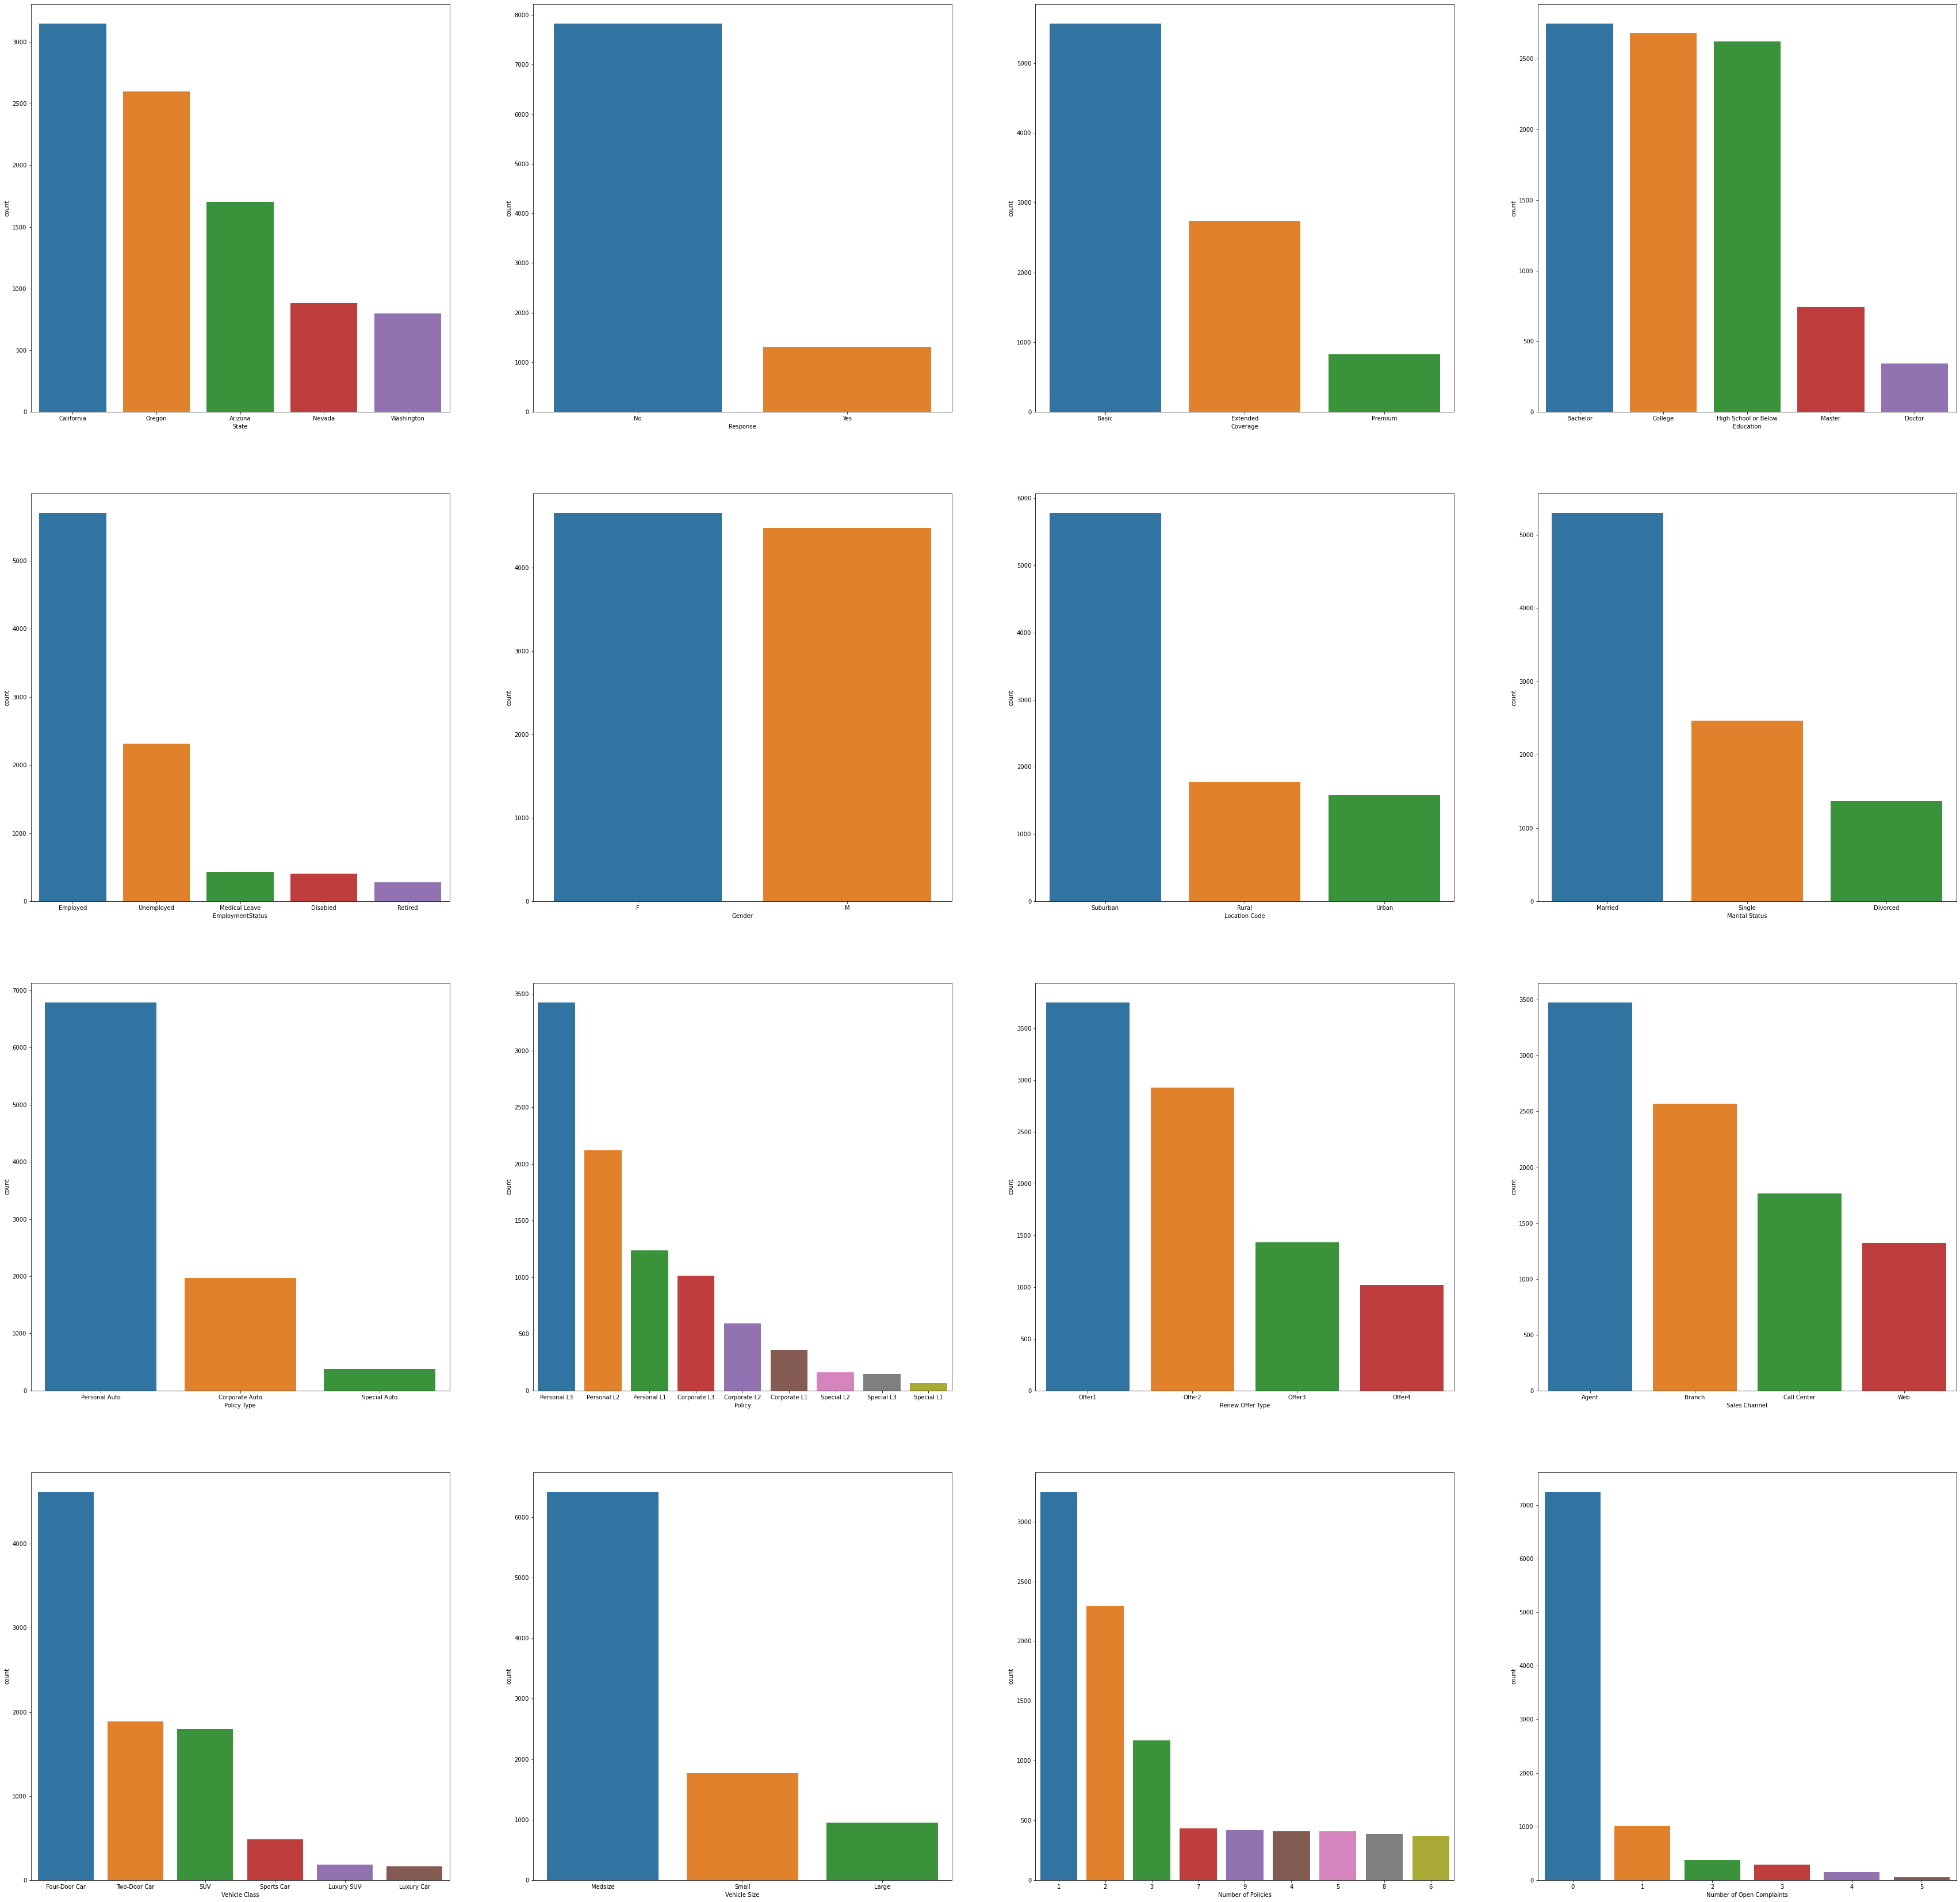

In [47]:
figure,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16))=plt.subplots(nrows=4,ncols=4)
figure.set_size_inches(60,60)
count('State',ax=ax1)
count('Response',ax=ax2)
count('Coverage',ax=ax3)
count('Education',ax=ax4)
count('EmploymentStatus',ax=ax5)
count('Gender',ax=ax6)
count('Location Code',ax=ax7)
count('Marital Status',ax=ax8)
count('Policy Type',ax=ax9)
count('Policy',ax=ax10)
count('Renew Offer Type',ax=ax11)
count('Sales Channel',ax=ax12)
count('Vehicle Class',ax=ax13)
count('Vehicle Size',ax=ax14)
count('Number of Policies',ax=ax15)
count('Number of Open Complaints',ax=ax16)

state : 캘리포니아주에 거주중인 고객이 가장 많았으며 오리건, 애리조나주에 사는 고객이 그 다음으로 많았다.
Response : 응답 여부는 No가 7826건으로 80% 이상의 표율을 보였다.
Coverage : 보험 등급은 Basic이 5568건으로 가장 많았고 Extended가 2742, Premium이 824건으로 고객중 대다수가                Basic~Extended인 것을 알 수 있었다.
Education : 고객의 학력은 4년제졸-2,3년제졸-고졸 이하 순으로 많았으나 비슷한 값을 보였고 석사졸이 741, 박사졸             이 342명으로 낮았다.
EmploymentStatus : 약 5700명정도가 직업을 가지고 있었으며 실업자 2317명, 병가자 432, 장애인이 405명, 퇴직자가                    282명이었다.
Gender : 남성이 4476, 여성이 4658명으로 여성이 약간 더 많았다.
Location Code : 도시 교외에 사는 사람이 5779명, 시골에 사는 사람이 1773명, 도시에 사는 사람이 1582명으로 나타                 났다.
Marital Status : 기혼이 5298명, 미혼이 2467명, 이혼이 1369명으로 나타났다.
Policy Type : 개인보험이 6788명으로 가장 많았으며 단체보험이 1968명, 특약보험이 378명으로 나타났다.
Policy : Policy Type변수에서 세분화된 것으로 개인보험의 경우 L3가 3426명, L2가 2122명, L1이 1240명이었고 단체          보험의 경우 L3가 1014명, L2가 595명, L1이 359명으로 나타났으며 특약보험의 경우 L2가 164명으로 특약중          가장 많았고 L3가 148명, L1이 66명으로 나타났다.
Renew Offer Type : Offer1이 3752명으로 가장 많았으며 Offer2가 2926명, Offer3가 1432명, Offer4가 1024명으로 나                    타났다.
Sales Channel : 약 3500명이 보험 대행점에서 보험을 구매하였고 지사에서 2567명, 콜센터를 통해 1765명이 구입하였                 으며 인터넷을 통해 1325명이 보험을 구입했던 것으로 나타났다.
Vehicle Class : Four-Door Car이 4621로 가장 많았고 Two-Door Car이 1886건, 그 밖에 SUV차량이 1796건, Sports                     Car, Luxury SUV, Luxury Car 등도 있었다.
Vehicle Size : 중형차가 가장 많았고 소형차-대형차 순으로 많았다.
Number of Policies : 약 6800명정도가 보험을 3개 이하를 구입했고 최대 9개까지 구입한 사람도 416명으로 꽤 있었                        다.
Number of Open Complaints : 해결되지 않은 불만건수의 결과 0부터 5까지 다양하게 있었으며 0(정상적으로 처리된 건                             수)이 7252건으로 가장 많았고 1이 1011건, 5가 56건이 있었다.

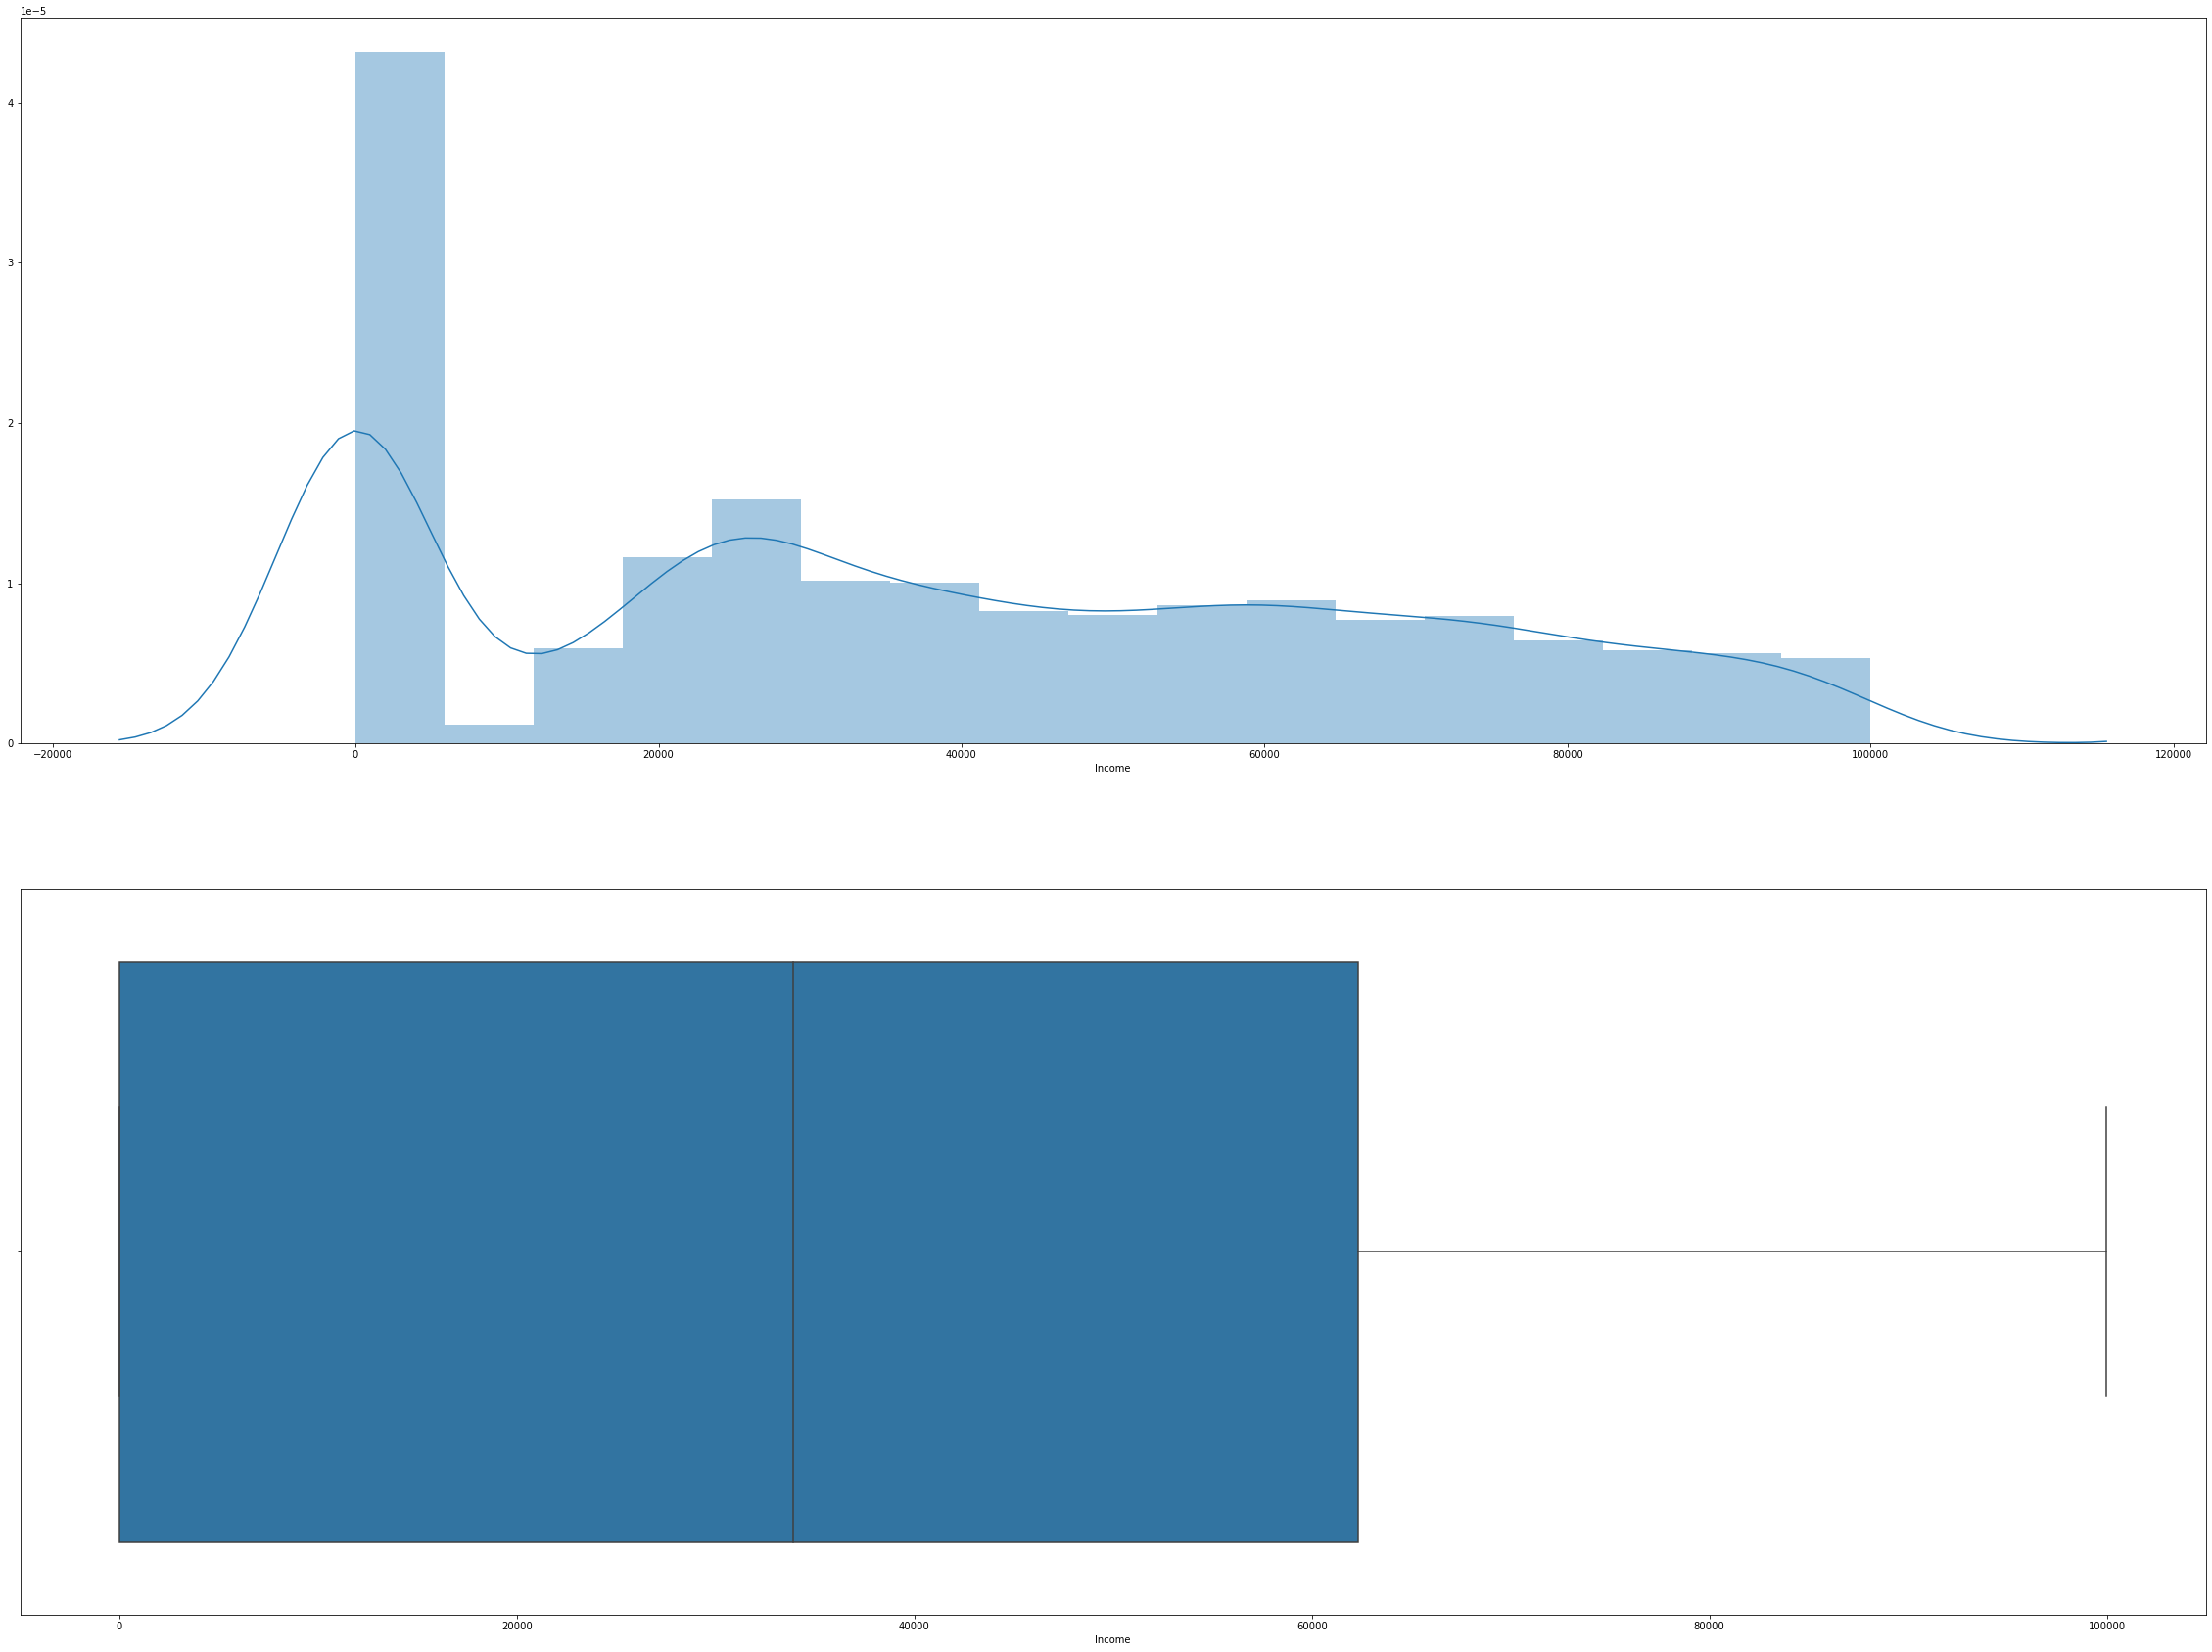

In [96]:
figure,((ax19,ax20))=plt.subplots(nrows=2)
figure.set_size_inches(40,30)
sns.distplot(data['Income'],ax=ax19)
sns.boxplot(data['Income'],ax=ax20)

고객들의 소득분포를 보고자 분포플랏을 그려본 결과 0부터 100000까지 다양하게 있었다. 20000~40000인 고객들이 가장 많았으며 그곳을 봉우리로 오른쪽으로 꼬리가 긴 분포임을 알 수 있었다. 한편 Income이 0에 위치한 고객들은 모두 unemployment인 것을 앞에서 설명했었다.

In [71]:
#효력 시간 EDA
import datetime as dt

In [92]:
#연도
data['year']=pd.DatetimeIndex(data['Effective To Date']).year
#월
data['month']=pd.DatetimeIndex(data['Effective To Date']).month
#일
data['day']=pd.DatetimeIndex(data['Effective To Date']).day

data['day7']=pd.DatetimeIndex(data['Effective To Date']).weekday

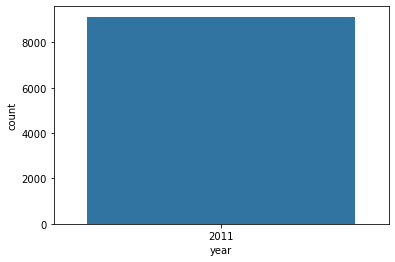

In [89]:
sns.countplot(x='year',data=data)
#자료는 모두 2011년 데이터

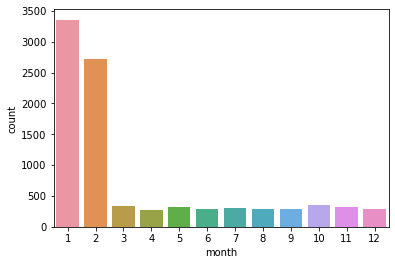

In [90]:
sns.countplot(x='month',data=data)

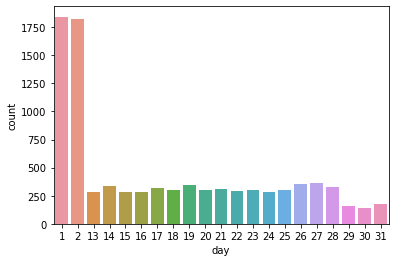

In [93]:
sns.countplot(x='day',data=data)

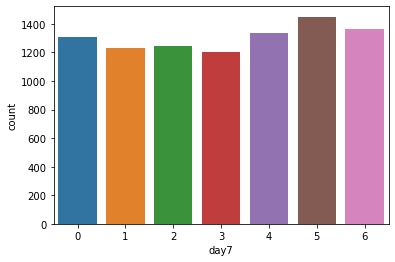

In [94]:
sns.countplot(x='day7',data=data)

In [119]:
#특약보험이거나 보험 개수가 5개 이상인 고객의 데이터만 추출하여 데이터프레임 생성 후 csv파일 저장
VIPdata=data[(data['Policy Type']=='Special Auto')|(data['Number of Policies']>=5)]

In [120]:
VIPdata

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,year,month,day,day7
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1,31,0
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,1,20,3
6,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,...,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize,2011,2,24,3
9,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,Urban,...,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize,2011,2,17,3
13,Arizona,8819.018934,Yes,Basic,High School or Below,10/1/2011,Employed,M,99845,Suburban,...,Corporate L3,Offer2,Branch,528.000000,SUV,Medsize,2011,10,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9077,California,5747.268347,No,Basic,Bachelor,1/20/11,Employed,M,23504,Suburban,...,Personal L3,Offer4,Call Center,350.400000,Four-Door Car,Small,2011,1,20,3
9084,California,6679.139606,No,Extended,High School or Below,10/2/2011,Unemployed,F,0,Suburban,...,Personal L2,Offer1,Agent,655.200000,Four-Door Car,Medsize,2011,10,2,6
9094,California,4873.672682,No,Basic,Bachelor,2/14/11,Unemployed,F,0,Suburban,...,Corporate L3,Offer1,Agent,356.083230,Four-Door Car,Medsize,2011,2,14,0
9101,California,9075.768214,Yes,Basic,Master,1/26/11,Employed,M,37722,Rural,...,Personal L3,Offer1,Agent,158.077504,Sports Car,Medsize,2011,1,26,2


In [121]:
VIPdata.to_csv('C:\\Users\\Jeong SeungJu\\OneDrive\\바탕 화면\\운수데통\\VIPdata.csv')

In [122]:
VIPdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2309 entries, 1 to 9106
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          2309 non-null   object 
 1   Customer Lifetime Value        2309 non-null   float64
 2   Response                       2309 non-null   object 
 3   Coverage                       2309 non-null   object 
 4   Education                      2309 non-null   object 
 5   Effective To Date              2309 non-null   object 
 6   EmploymentStatus               2309 non-null   object 
 7   Gender                         2309 non-null   object 
 8   Income                         2309 non-null   int64  
 9   Location Code                  2309 non-null   object 
 10  Marital Status                 2309 non-null   object 
 11  Monthly Premium Auto           2309 non-null   int64  
 12  Months Since Last Claim        2309 non-null   i

In [123]:
VIPdata2=VIPdata.drop(['Effective To Date','year','month','day','day7','Policy Type','Policy'],axis=1)

In [132]:
#변수변환
State_dic={'Washington':0,'Arizona':1,'Nevada':2,'California':3,'Oregon':4}
VIPdata2['State']=VIPdata2['State'].map(State_dic)

In [135]:
Response_dic={'No':0,'Yes':1}
VIPdata2['Response']=VIPdata2['Response'].map(Response_dic)

In [139]:
Coverage_dic={'Basic':0,'Extended':1,'Premium':2}
VIPdata2['Coverage']=VIPdata2['Coverage'].map(Coverage_dic)

In [144]:
Education_dic={'Bachelor':0,'College':1,'High School or Below':2,'Master':3,'Doctor':4}
VIPdata2['Education']=VIPdata2['Education'].map(Education_dic)

In [148]:
EmploymentStatus_dic={'Employed':0,'Unemployed':1,'Medical Leave':2,'Disabled':3,'Retired':4}
VIPdata2['EmploymentStatus']=VIPdata2['EmploymentStatus'].map(EmploymentStatus_dic)

In [152]:
Gender_dic={'M':0,'F':1}
VIPdata2['Gender']=VIPdata2['Gender'].map(Gender_dic)

In [157]:
Location_dic={'Suburban':0,'Rural':1,'Urban':2}
VIPdata2['Location Code']=VIPdata2['Location Code'].map(Location_dic)

In [161]:
Marital_dic={'Married':0,'Single':1,'Divorced':2}
VIPdata2['Marital Status']=VIPdata2['Marital Status'].map(Marital_dic)

In [166]:
Offer_dic={'Offer1':0,'Offer2':1,'Offer3':2,'Offer4':3}
VIPdata2['Renew Offer Type']=VIPdata2['Renew Offer Type'].map(Offer_dic)

In [171]:
Sales_dic={'Agent':0,'Call Center':1,'Web':2,'Branch':3}
VIPdata2['Sales Channel']=VIPdata2['Sales Channel'].map(Sales_dic)

In [175]:
Class_dic={'Four-Door Car':0,'Two-Door Car':1,'SUV':2,'Sports Car':3,'Luxury SUV':4,'Luxury Car':5}
VIPdata2['Vehicle Class']=VIPdata2['Vehicle Class'].map(Class_dic)

In [180]:
Size_dic={'Small':0,'Medsize':1,'Large':2}
VIPdata2['Vehicle Size']=VIPdata2['Vehicle Size'].map(Size_dic)

In [181]:
VIPdata2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2309 entries, 1 to 9106
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          2309 non-null   int64  
 1   Customer Lifetime Value        2309 non-null   float64
 2   Response                       2309 non-null   int64  
 3   Coverage                       2309 non-null   int64  
 4   Education                      2309 non-null   int64  
 5   EmploymentStatus               2309 non-null   int64  
 6   Gender                         2309 non-null   int64  
 7   Income                         2309 non-null   int64  
 8   Location Code                  2309 non-null   int64  
 9   Marital Status                 2309 non-null   int64  
 10  Monthly Premium Auto           2309 non-null   int64  
 11  Months Since Last Claim        2309 non-null   int64  
 12  Months Since Policy Inception  2309 non-null   i

In [187]:
cormat=VIPdata2.corr()

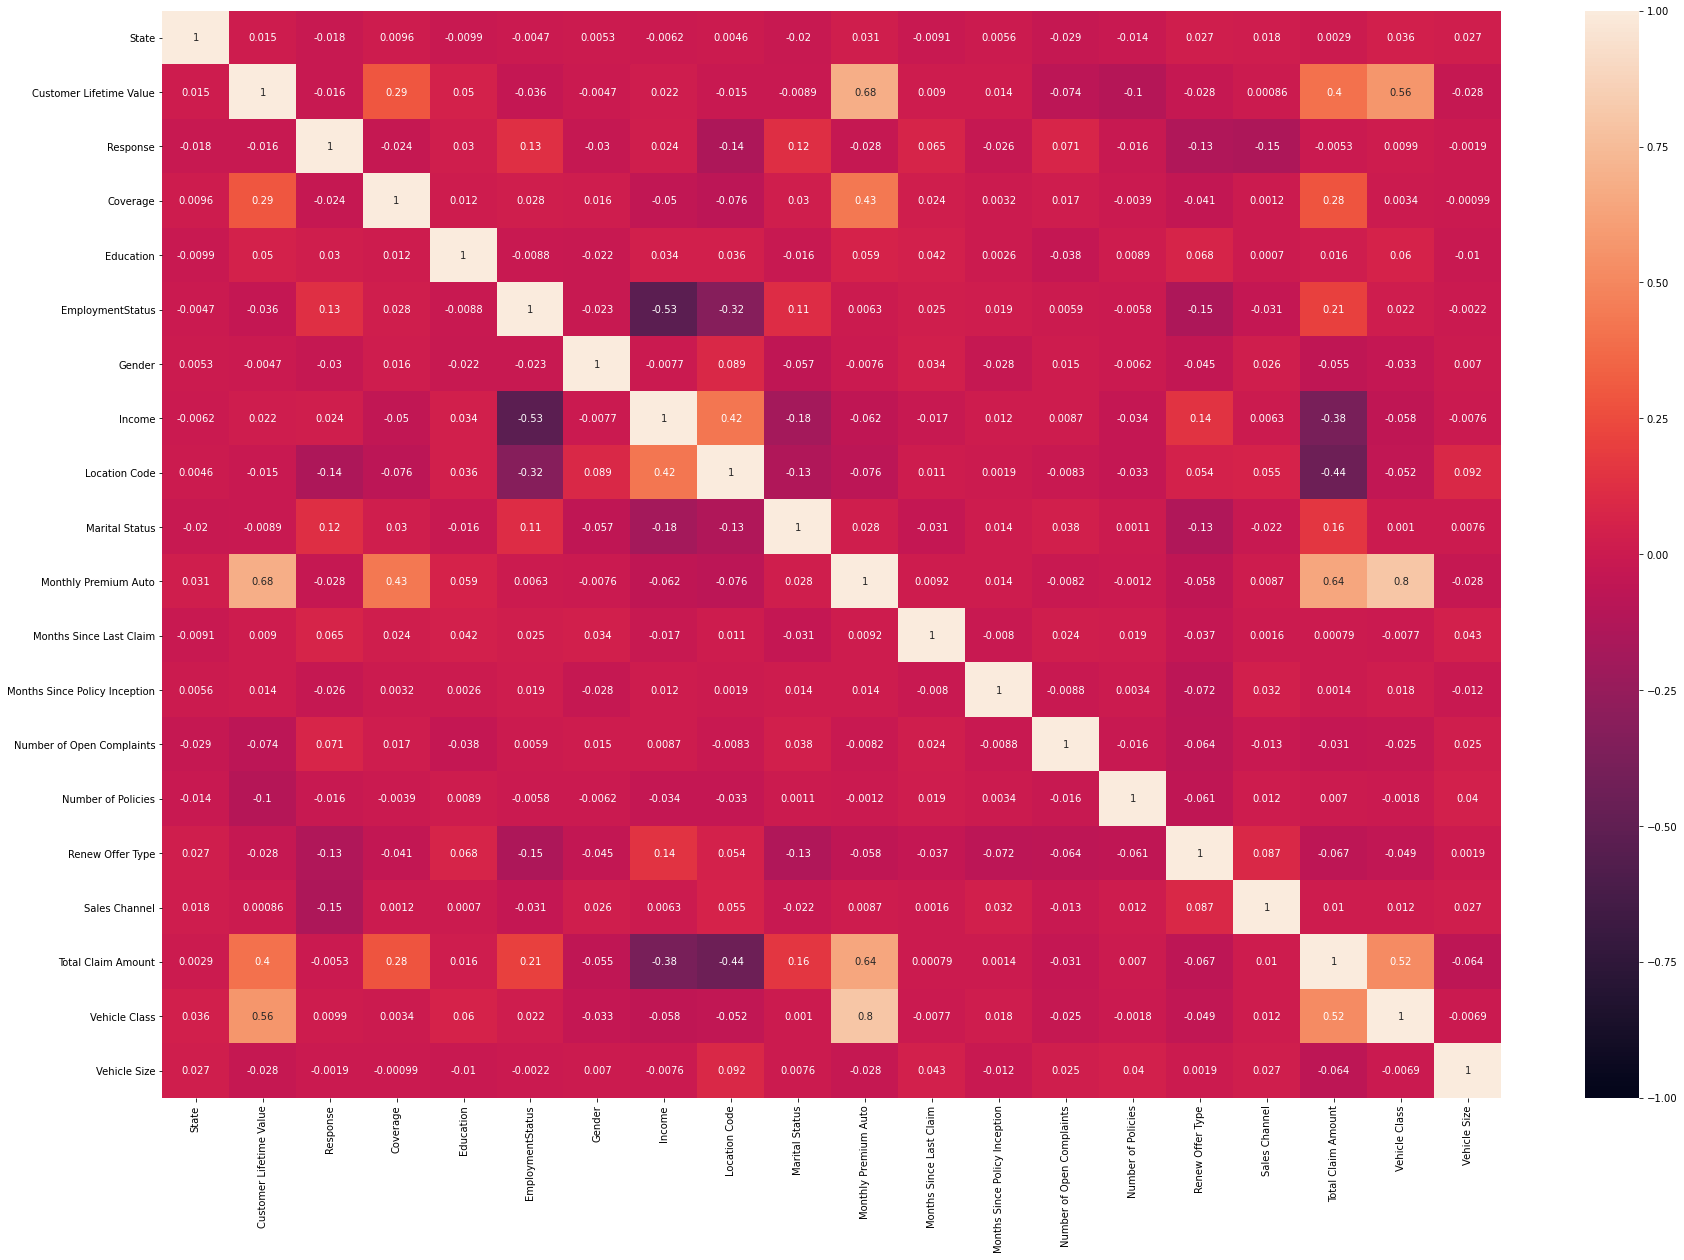

In [194]:
plt.figure(figsize=(30,20))
sns.heatmap(cormat,vmax=1,vmin=-1,annot=True)

상관분석 결과 
1. 차량 클래스와 월 자동차 보험료의 상관계수가 0.8로 상관계수들 가운데 가장 강한 상관관계를 보였으며 비싼 차      (Luxury SUV, Luxury Car)일 수록 월별 자동차비를 더   많이 낸다는 것을 알 수 있었다. 
2. 고객생애가치와 월 자동차 보험료 사이의 상관계수가 0.68로 강한 선형관계를 보여주었으며 이는 월 자동차 보험료    를 많이 낼 수록 사고가 있을 경우 보험금을 더 많이 받을 수 있음을 의미한다. 월 자동차 보험료와 총 보험청구액    사이에도 0.64로 자동차보험료를 많이 낼 수록 보험청구액이 더 많다는 것을 알 수 있었다.
3. 반면 수입과 총 보험청구액의 상관계수가 -0.38로 뚜렷한 음의상관관계가 있었으며 돈을 많이 벌 수록 고객들이 보    험청구를 덜 하는 것으로 보여졌다.

In [231]:
#머신러닝
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [228]:
x=VIPdata2.drop(['Gender'],axis=1)
x=x.values

In [229]:
y=VIPdata2['Gender'].values

In [233]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.3)

In [236]:
fit=LogisticRegression().fit(x,y)

In [249]:
#데이터를 통해 성별 확률 예측
y_predict = fit.predict_proba(x)
genderdata=pd.DataFrame(y_predict,columns=['Male Proba','Female Proba'])

In [256]:
genderdata

,Male Proba,Female Proba
0,0.610956,0.389044
1,0.486734,0.513266
2,0.536572,0.463428
3,0.474788,0.525212
4,0.523825,0.476175
...,...,...
2304,0.533800,0.466200
2305,0.567763,0.432237
2306,0.495479,0.504521
2307,0.435158,0.564842
